In [1]:
pip install pandas statsmodels seaborn


In [4]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [9]:
# 2. Load the dataset from URL
url = "https://stats.idre.ucla.edu/stat/stata/dae/binary.dta"
data = pd.read_stata(url)

# Show first few rows
print(data.head())


   admit    gre   gpa  rank
0    0.0  380.0  3.61   3.0
1    1.0  660.0  3.67   3.0
2    1.0  800.0  4.00   1.0
3    1.0  640.0  3.19   4.0
4    0.0  520.0  2.93   4.0


In [10]:
# 3. Convert 'rank' to dummy variables
data = pd.get_dummies(data, columns=['rank'], drop_first=True)

# Check new column names
print("Columns after get_dummies:", data.columns.tolist())


Columns after get_dummies: ['admit', 'gre', 'gpa', 'rank_2.0', 'rank_3.0', 'rank_4.0']


In [11]:
# 4. Define predictor variables (X) and response variable (y)
y = data['admit'].astype(float)  # ensure y is numeric
X = data.drop(columns=['admit']).astype(float)  # drop target from predictors

# Add constant term for intercept
X = sm.add_constant(X)


In [12]:
# 5. Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Show the model summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 30 Jul 2025   Pseudo R-squ.:                 0.08292
Time:                        16:40:04   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9900      1.140     -3.500      0.000      -6.224      -1.756
gre            0.0023      0.

In [13]:
# 6. Compute and print odds ratios
print("\nOdds Ratios:")
print(np.exp(result.params))



Odds Ratios:
const       0.018500
gre         1.002267
gpa         2.234545
rank_2.0    0.508931
rank_3.0    0.261792
rank_4.0    0.211938
dtype: float64


In [14]:
# 7. Predict admission probabilities for all rows
predicted_probs = result.predict(X)

# Show first 5 predicted probabilities
print("\nPredicted Probabilities (first 5):")
print(predicted_probs.head())



Predicted Probabilities (first 5):
0    0.172627
1    0.292175
2    0.738408
3    0.178385
4    0.118354
dtype: float64


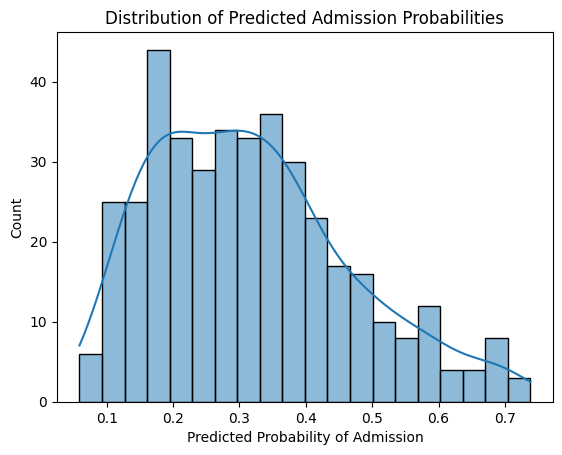

In [15]:
# 8. Plot predicted probability distribution
sns.histplot(predicted_probs, bins=20, kde=True)
plt.xlabel("Predicted Probability of Admission")
plt.title("Distribution of Predicted Admission Probabilities")
plt.show()
